# Exploratory Data Analysis (EDA) on Dengue Cases 
The following datasets will be used to explore the relationship between dengue cases and its said variables i.e. temperature, total rainfall, internet 
search trends, and town locations. The EDA will provide a baseline understanding for our modeling process, to determine which variables have a positive or inverse relationship with dengue cases. Additionally, it may give us a base insight on the dengue control measures taken by NEA but for the purpose of this EDA, there is a limitation on the publicly available datasets for the dengue control measures; hence an $inference$ will be made instead on the following dengue control measures/campaigns.

From 2012 - 2022 only 3 Dengue campaigns:
   - 15 jun 2014 : "Do The Mozzie Wipe Out" 
   - 19 nov 2020 : "Mozzie Proof Your Home"
   - 29 apr 2021 : "B-L-O-C-K and S-A-W"

Vector controle measure: Project Wolbachia
   - 2016: Launched of Project Wolbachia 

#### We are interested to find out the following on dengue cases:
1. The highest / lowest year of dengue cases by weekly, monthly, yearly
2. The correlation of temperature against dengue cases; if it is a positive or inverse relatonship.
3. The mean temperature that impact the rise and fall of dengue cases.
4. The correlation of rainfall against dengue cases; if it is a positive or inverse relatonship.
5. The multi correlation of rainfall and temperature against dengue cases.
6. The correlation of google search trends against dengue cases.
7. The relation of dengue cases and town locations; if a specific location yields higher or lower dengue cases.

---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Read Datasets

In [2]:
path = './data/'

df_weekly = pd.read_csv(path+'weekly_data.csv').rename(columns={'Unnamed: 0': 'year_week'}).set_index('year_week')
df_monthly = pd.read_csv(path+'monthly_data.csv').rename(columns={'Unnamed: 0': 'year_month'}).set_index('year_month')
df_yearly = pd.read_csv(path+'yearly_data.csv').set_index('year')
df_weekly_cumulative = pd.read_csv(path+'weekly_data_cumulative.csv').set_index('week')
df_monthly_cumulative = pd.read_csv(path+'monthly_data_cumulative.csv').set_index('month')

In [3]:
# Function to plot three line charts together for comparison purposes.

def compare_3_lines(df=None, cols_list=None, ylim=[20, 30], start=2012, end=2023, style='o-', title=None):

    ax = df.plot(y=cols_list[0], legend=False, ylabel=cols_list[0], style=style, figsize=(13,5))
    
    df.plot(y=cols_list[1], ax=ax, legend=False, ylabel=cols_list[1], color='r', style=style)
        
    ax2 = ax.twinx()

    ax2.set_ylim(ylim[0], ylim[1])

    df.plot(y=cols_list[2], ax=ax2, legend=False, ylabel=cols_list[2], color='g', style=style)
    
    ax.figure.legend()
    
    plt.title(title)
    
    # plt.xlim(start, end)
    
    plt.show();

In [4]:
# Function to plot two line charts together for comparison purposes.

def compare_lines(df=None, same_axis=False, cols_list=None, style='o-', title=None):
    
    if same_axis:
        
        ax = df.plot(y=cols_list, legend=False, ylabel=cols_list[0].split('_')[-1], style=style, color=['b', 'r', 'g'], figsize=(13,5))
        
    else:

        ax = df.plot(y=cols_list[0], legend=False, ylabel=cols_list[0], style=style, figsize=(13,5))

        ax2 = ax.twinx()

        df.plot(y=cols_list[1], ax=ax2, legend=False, ylabel=cols_list[1], color='r', style=style)
    
    ax.figure.legend()
    
    plt.title(title)
    
    plt.show();

## 1. Yearly Dengue Cases

Text(0.5, 1.0, 'Annual Dengue Cases')

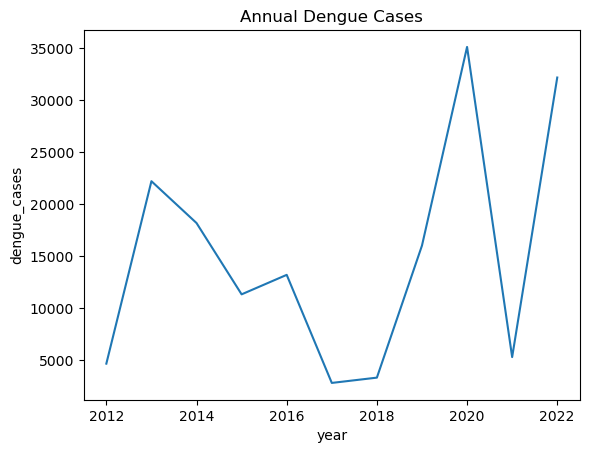

In [5]:
sns.lineplot(df_yearly['dengue_cases'])
plt.title('Annual Dengue Cases')

# 4 peaks in the following years: 2013, 2016, 2020 and 2022

[Text(0, 0, '4632'),
 Text(0, 0, '22194'),
 Text(0, 0, '18168'),
 Text(0, 0, '11303'),
 Text(0, 0, '13179'),
 Text(0, 0, '2776'),
 Text(0, 0, '3285'),
 Text(0, 0, '15998'),
 Text(0, 0, '35121'),
 Text(0, 0, '5264'),
 Text(0, 0, '32175')]

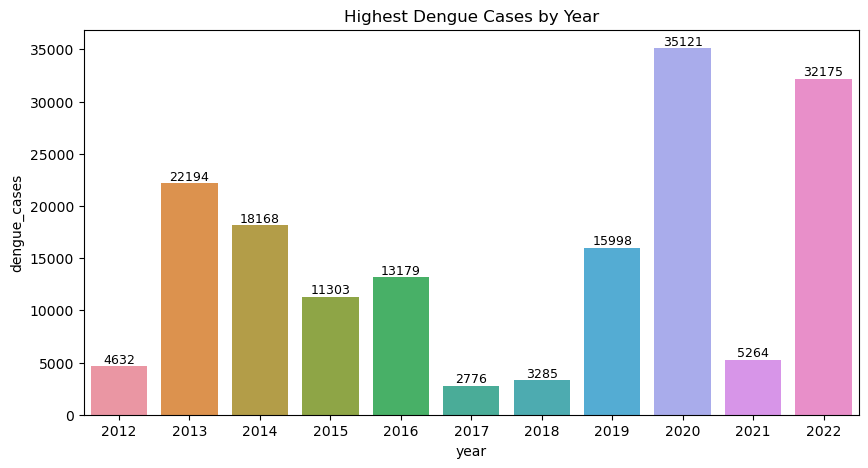

In [6]:
yearly_dengue=df_yearly['dengue_cases'].reset_index()
yearly_dengue_sorted_high=yearly_dengue.groupby('year', as_index=False).max().sort_values('dengue_cases',ascending=False)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=yearly_dengue_sorted_high,x='year',y='dengue_cases')
plt.title('Highest Dengue Cases by Year')
ax.bar_label(ax.containers[0], fontsize=9)

## Observations On Yearly Dengue Cases

- The pre-pandemic years which had the highest dengue cases were in 2013 and 2014. It could be inferred that with the NEA Campaign " Do the Mozzie Wipe Out" was launched in 2014, may have contributed to the decrease of dengue cases from from 2013 to 2014. And in 2015, the dengue cases was significantly lower than 2013.

- The pandemic year of 2020 onwards saw a significant rise of dengue cases at its highest. That same year in Nov 2020, another dengue campaign "Mozzie Proof your Home" was launched followed by another campaign 6 months later " B-L-O-C-K" which was launched in Apr 2021. Similarly, it could be inferred that these public campaigns may have caused a significant decrease of dengue cases in 2021. 

- However in 2022, dengue cases reached another peak.

- Across the whole year we will classify the dengue cases in terms of severity defined as:
    - 1. Level 1: low dengue cases recorded for the years in 2012, 2017, 2018, 2021
    - 2. Level 2: medium dengue cases recorded for the years in 2015, 2016
    - 3. Level 3: high dengue cases recorded for the years in 2013, 2014, 2019, 2020, 2022

---

## 2. Monthly Dengue Cases

Text(0.5, 1.0, 'Cumulative Monthly Dengue Cases')

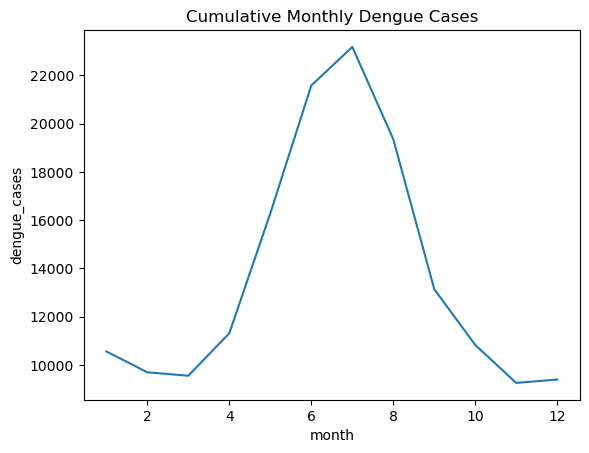

In [7]:
sns.lineplot(df_monthly_cumulative['dengue_cases'])
plt.title('Cumulative Monthly Dengue Cases')

#the months of June, July and Aug have the highest dengue cases - why? relation to temperature in those months?

Text(1.0, 1.0, 'Pairplot Monthly Dengue Cases')

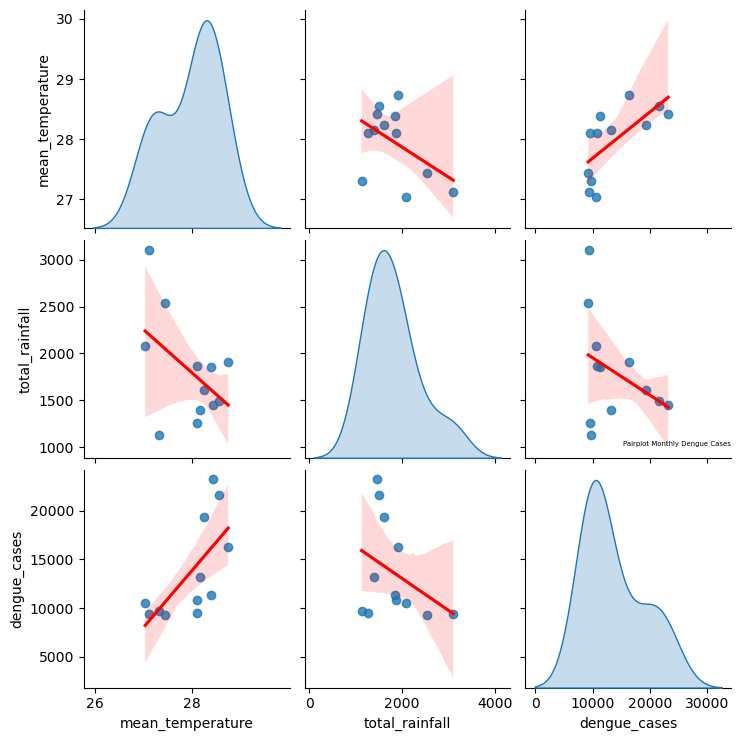

In [8]:
eda_df_monthly_cumulative = df_monthly_cumulative.drop(['inbound','outbound','minimum_temperature','maximum_temperature'],axis=1)
sns.pairplot(eda_df_monthly_cumulative,kind = 'reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.title('Pairplot Monthly Dengue Cases',loc='right',fontsize=(5))

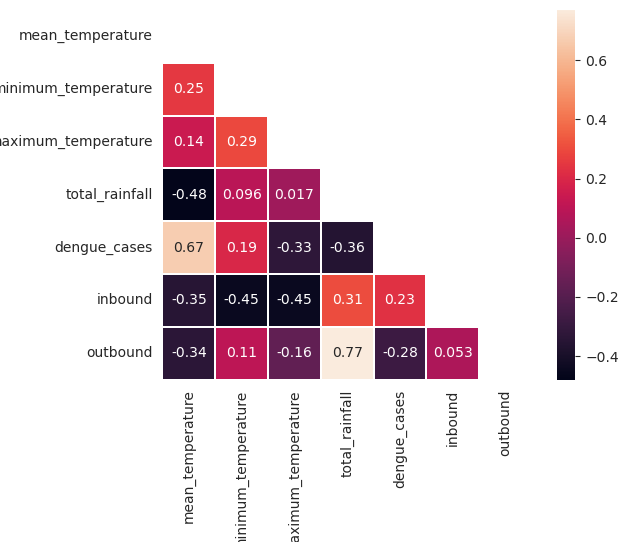

In [9]:
mask=np.zeros_like(df_monthly_cumulative.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(df_monthly_cumulative.corr(), annot=True, mask = mask, square = True, linewidths = .3)

In [10]:
x=df_monthly_cumulative.reset_index()
x.head(2)

month  mean_temperature  minimum_temperature  maximum_temperature  \
0      1         27.031709                 21.3                 35.2   
1      2         27.311263                 21.5                 34.1   

   total_rainfall  dengue_cases   inbound  outbound  
0          2078.9         10554  12937871   5948586  
1          1130.4          9689  11288976   5587524

[Text(0, 0, '13135'),
 Text(0, 0, '19356'),
 Text(0, 0, '23183'),
 Text(0, 0, '21584'),
 Text(0, 0, '16280')]

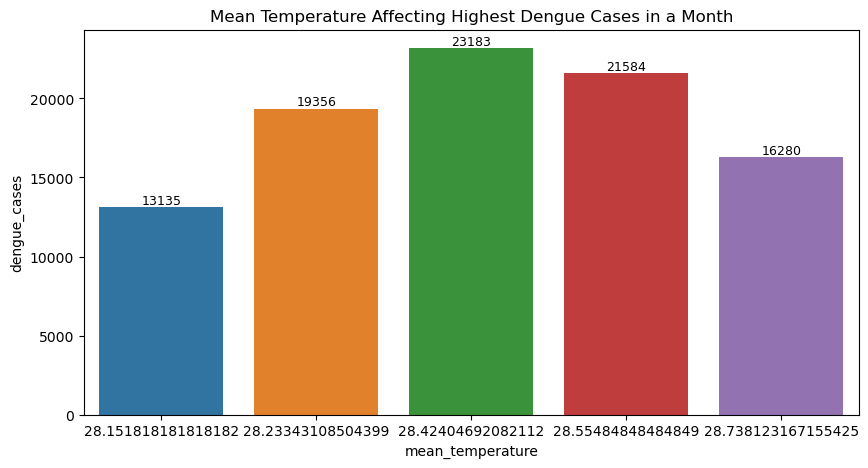

In [11]:
x=df_monthly_cumulative.reset_index()
sorted_monthly_cumulative = x.groupby('dengue_cases').max()[['mean_temperature','total_rainfall']].sort_values(by='dengue_cases',ascending=False).reset_index()
top5=sorted_monthly_cumulative.head(5)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=top5,x='mean_temperature',y='dengue_cases')
plt.title('Mean Temperature Affecting Highest Dengue Cases in a Month')
ax.bar_label(ax.containers[0], fontsize=9)

[Text(0, 0, '13135'),
 Text(0, 0, '23183'),
 Text(0, 0, '21584'),
 Text(0, 0, '19356'),
 Text(0, 0, '16280')]

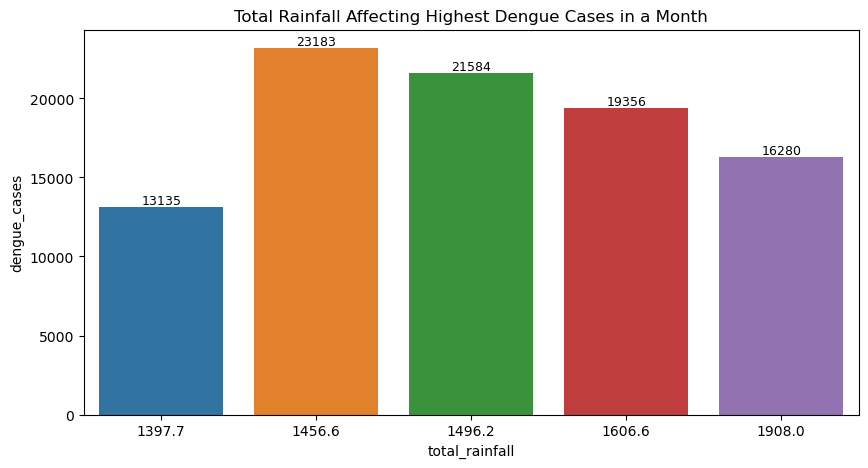

In [12]:
x=df_monthly_cumulative.reset_index()
sorted_monthly_cumulative = x.groupby('dengue_cases').max()[['mean_temperature','total_rainfall']].sort_values(by='dengue_cases',ascending=False).reset_index()
top5=sorted_monthly_cumulative.head(5)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=top5,x='total_rainfall',y='dengue_cases')
plt.title('Total Rainfall Affecting Highest Dengue Cases in a Month')
ax.bar_label(ax.containers[0], fontsize=9)

In [13]:
# display the mean temperature and total rainfall values when dengue cases are at its lowest. 
low5=sorted_monthly_cumulative.tail(20)
low5

dengue_cases  mean_temperature  total_rainfall
0          23183         28.424047          1456.6
1          21584         28.554848          1496.2
2          19356         28.233431          1606.6
3          16280         28.738123          1908.0
4          13135         28.151818          1397.7
5          11309         28.383333          1857.4
6          10821         28.098827          1864.0
7          10554         27.031709          2078.9
8           9689         27.311263          1130.4
9           9546         28.095015          1263.6
10          9390         27.116422          3105.3
11          9248         27.430909          2539.0

[Text(0, 0, '10554'),
 Text(0, 0, '9689'),
 Text(0, 0, '9546'),
 Text(0, 0, '11309'),
 Text(0, 0, '16280'),
 Text(0, 0, '21584'),
 Text(0, 0, '23183'),
 Text(0, 0, '19356'),
 Text(0, 0, '13135'),
 Text(0, 0, '10821'),
 Text(0, 0, '9248'),
 Text(0, 0, '9390')]

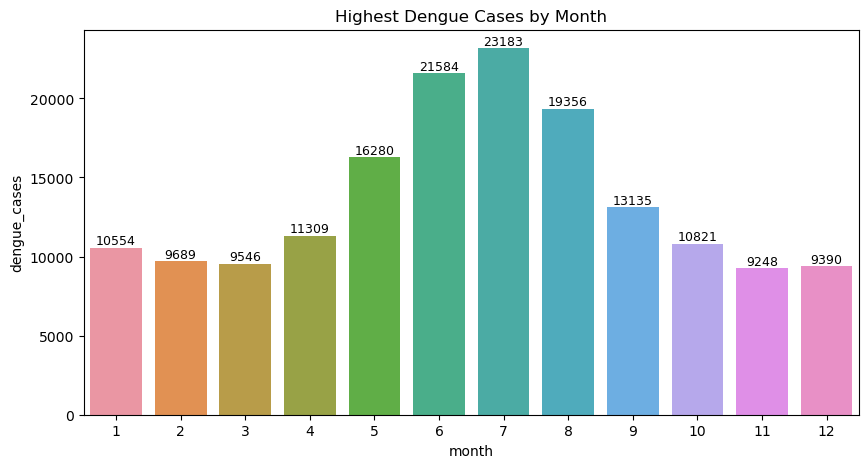

In [14]:
monthly_dengue=df_monthly_cumulative['dengue_cases'].reset_index()
monthly_dengue_sorted_high=monthly_dengue.groupby('month',as_index=False).max().sort_values('dengue_cases',ascending=False)
top20=monthly_dengue_sorted_high.head(20)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=top20,x='month',y='dengue_cases')
plt.title('Highest Dengue Cases by Month')
ax.bar_label(ax.containers[0], fontsize=9)

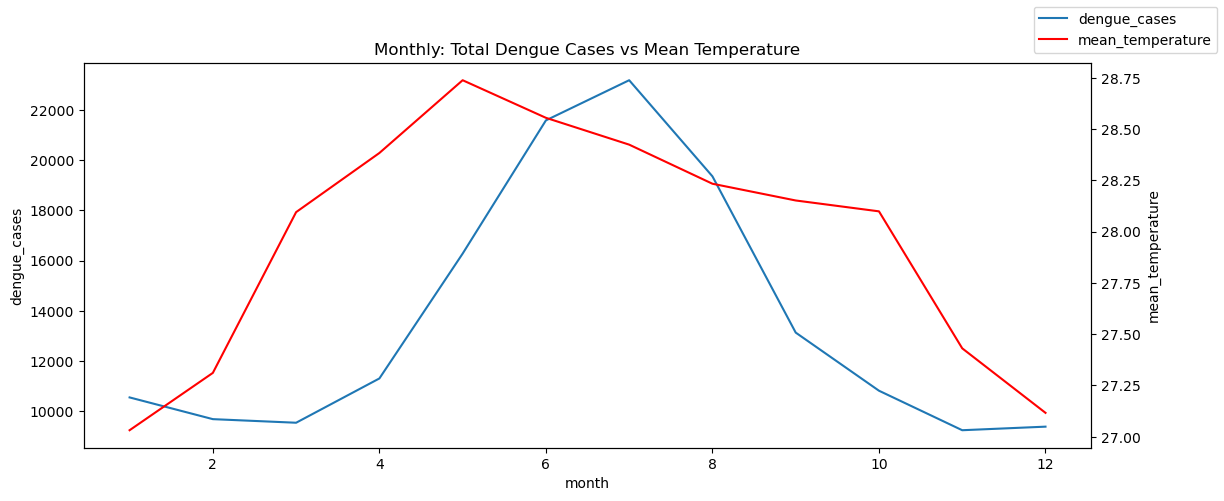

In [15]:
compare_lines(
    df=df_monthly_cumulative, 
    cols_list=['dengue_cases', 'mean_temperature'], 
    style='-',
    title='Monthly: Total Dengue Cases vs Mean Temperature'
)

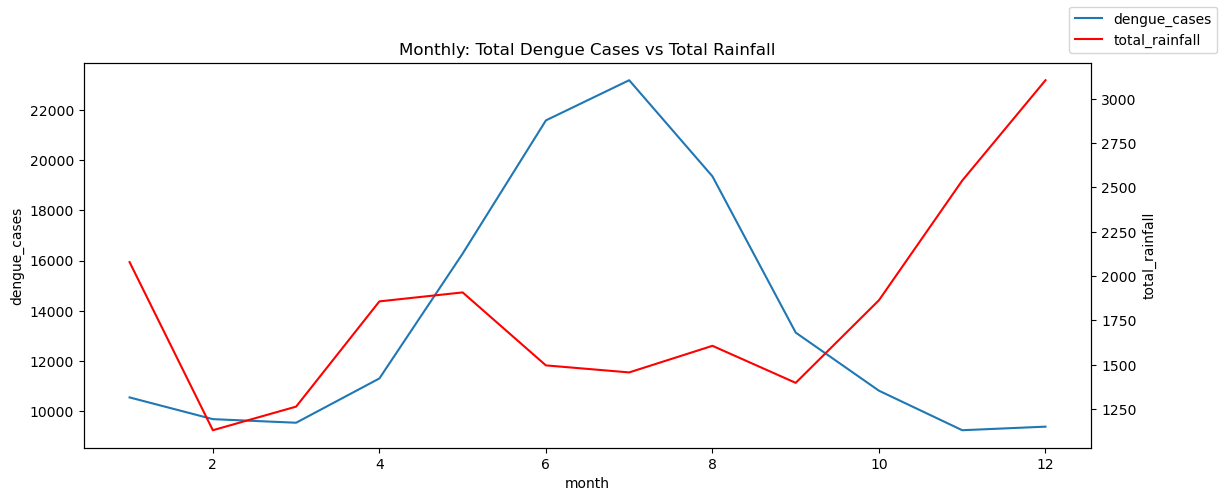

In [16]:
compare_lines(
    df=df_monthly_cumulative, 
    cols_list=['dengue_cases', 'total_rainfall'], 
    style='-',
    title='Monthly: Total Dengue Cases vs Total Rainfall'
)

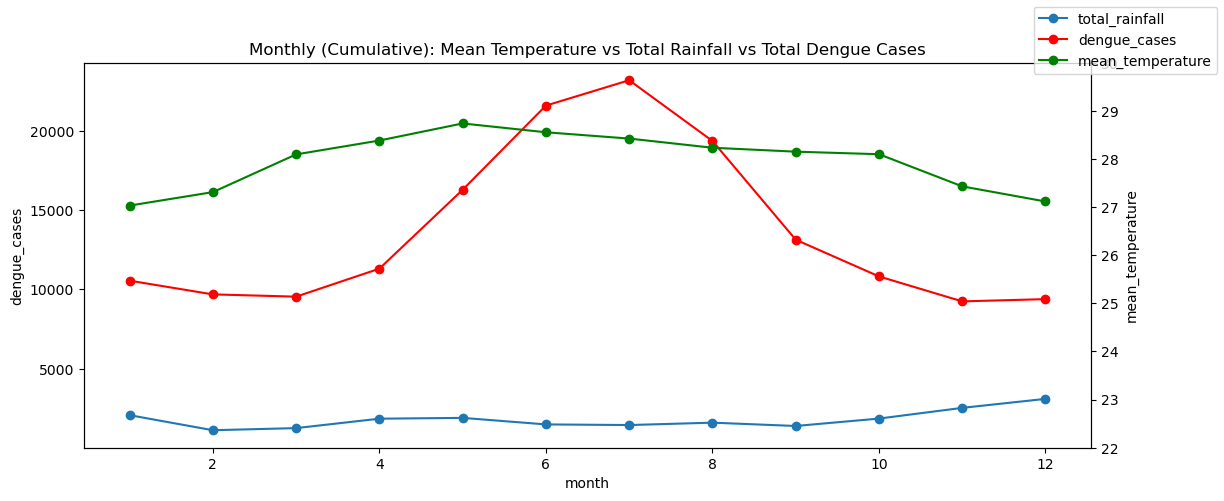

In [17]:
# Examining relationships between temperature, rainfall & dengue cases.

compare_3_lines(
    df=df_monthly_cumulative, 
    cols_list=['total_rainfall', 'dengue_cases', 'mean_temperature'],
    ylim=[22,30],
    style='o-',
    title='Monthly (Cumulative): Mean Temperature vs Total Rainfall vs Total Dengue Cases'
)

<AxesSubplot: xlabel='mean_temperature', ylabel='dengue_cases'>

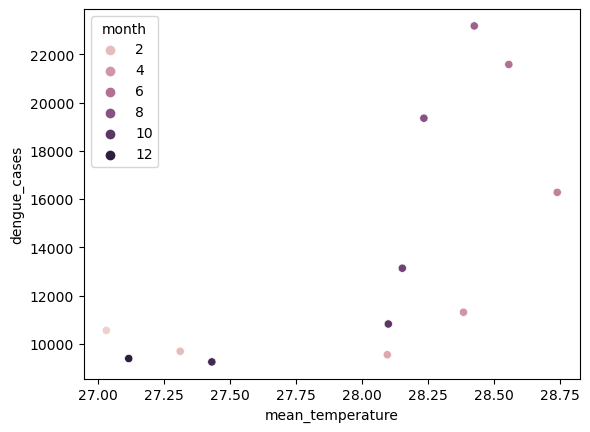

In [18]:
sns.scatterplot(data=df_monthly_cumulative,x="mean_temperature", y="dengue_cases", hue="month")

<AxesSubplot: xlabel='total_rainfall', ylabel='dengue_cases'>

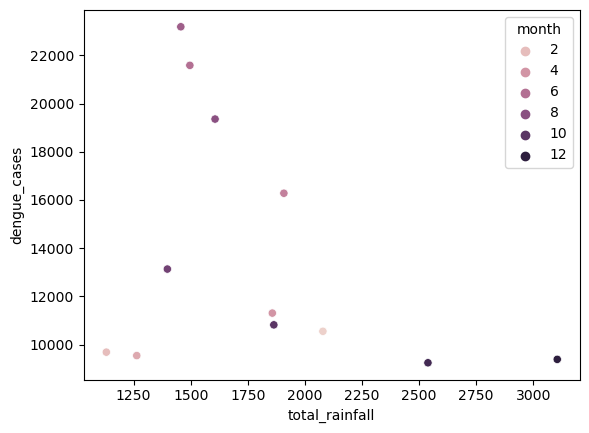

In [ ]:
sns.scatterplot(data=df_monthly_cumulative,x="total_rainfall", y="dengue_cases", hue="month")

## Observations On Monthly Dengue Cases

- There is a positive correlation between dengue cases and mean temperature while there is a negative correlation between dengue cases and total rainfall. 

- It appears dengue cases reached it peak at 28.4&deg;C temperature and at 1457mm total rainfall. 

- It appears when rainfall is more than 2000mm, dengue cases are lower. This could be because at a certain rainfall volume, the breeding sites for mosquitoes are impacted. 

- It appears when temperature is below 28&deg;C, at about 27&deg;C, dengue cases are lower. 

- The months of May to Sep recorded the highest dengue cases with June and July months accorded the highest number of dengue cases at 21k and above. 

- The months of Nov and Dec recorded the lowest dengue cases below 10k a month. The temperature for this 2 months was at 27&deg;C with total rainfall ranging from 2500mm to 3000mm. 

---

## 3. Weekly Dengue Cases

Text(1.0, 1.0, 'Pairplot Weekly Dengue Cases')

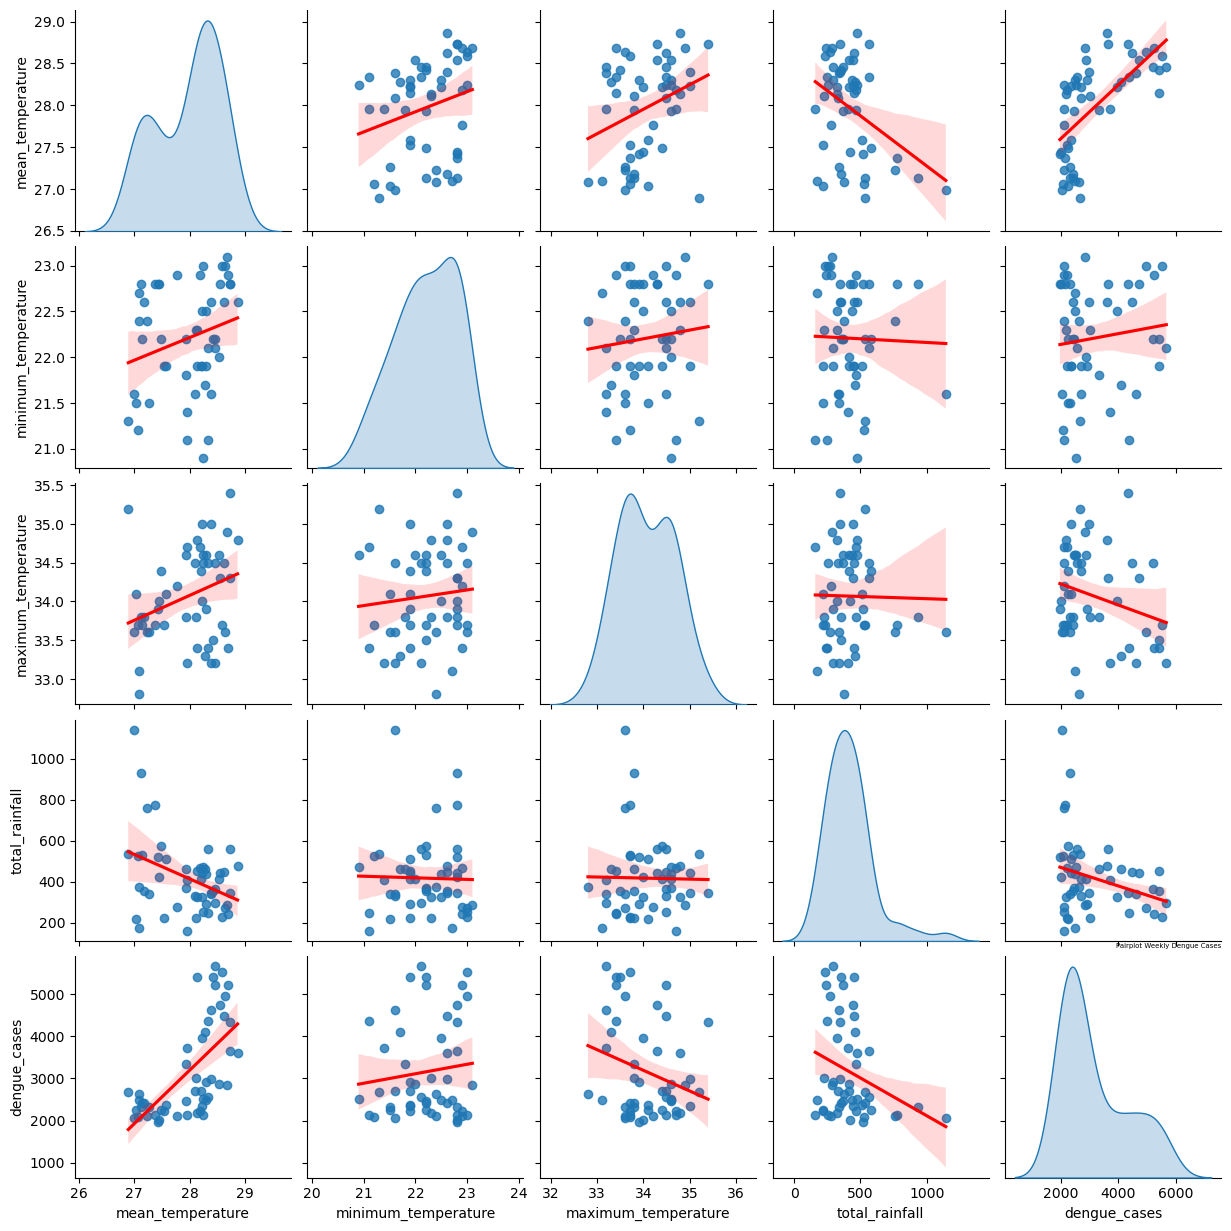

In [20]:
eda_df_weekly_cumulative = df_weekly_cumulative.drop(['inbound','outbound'],axis=1)
sns.pairplot(eda_df_weekly_cumulative,kind = 'reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.title('Pairplot Weekly Dengue Cases',loc='right',fontsize=(5))

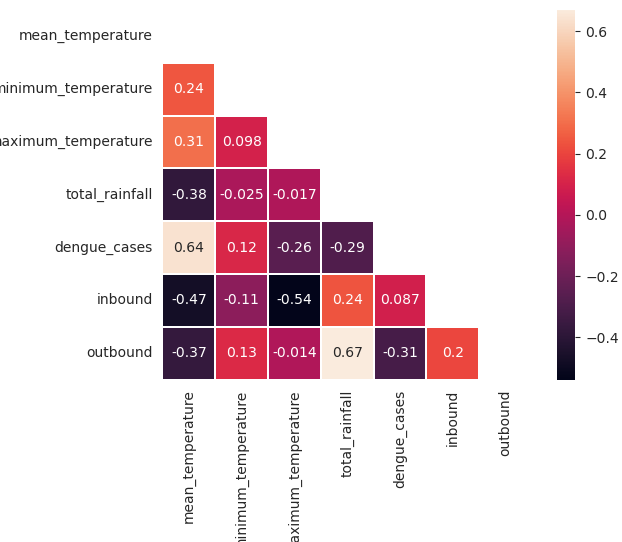

In [21]:
mask=np.zeros_like(df_weekly_cumulative.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(df_weekly_cumulative.corr(), annot=True, mask = mask, square = True, linewidths = .3)

[Text(0, 0, '5398'),
 Text(0, 0, '5403'),
 Text(0, 0, '5658'),
 Text(0, 0, '5511'),
 Text(0, 0, '5216')]

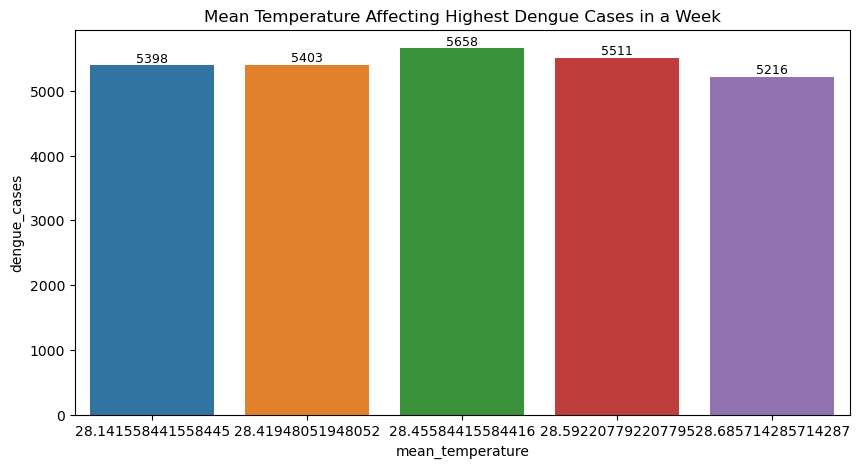

In [155]:
x=df_weekly_cumulative.reset_index()
sorted_weekly_cumulative = x.groupby('dengue_cases').max()[['mean_temperature','total_rainfall']].sort_values(by='dengue_cases',ascending=False).reset_index()
top5=sorted_weekly_cumulative.head(5)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=top5,x='mean_temperature',y='dengue_cases')
plt.title('Mean Temperature Affecting Highest Dengue Cases in a Week')
ax.bar_label(ax.containers[0], fontsize=9)

[Text(0, 0, '5511'),
 Text(0, 0, '5216'),
 Text(0, 0, '5658'),
 Text(0, 0, '5403'),
 Text(0, 0, '5398')]

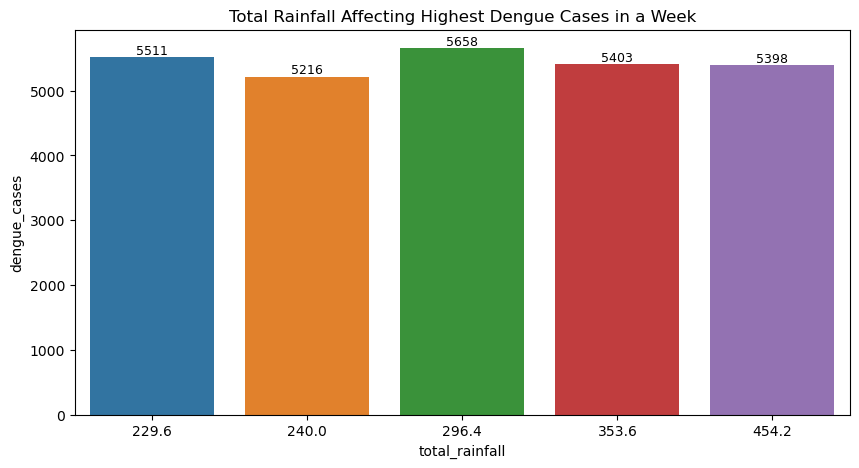

In [160]:
x=df_weekly_cumulative.reset_index()
sorted_weekly_cumulative = x.groupby('dengue_cases').max()[['mean_temperature','total_rainfall']].sort_values(by='dengue_cases',ascending=False).reset_index()
top5=sorted_weekly_cumulative.head(5)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=top5,x='total_rainfall',y='dengue_cases')
plt.title('Total Rainfall Affecting Highest Dengue Cases in a Week')
ax.bar_label(ax.containers[0], fontsize=9)

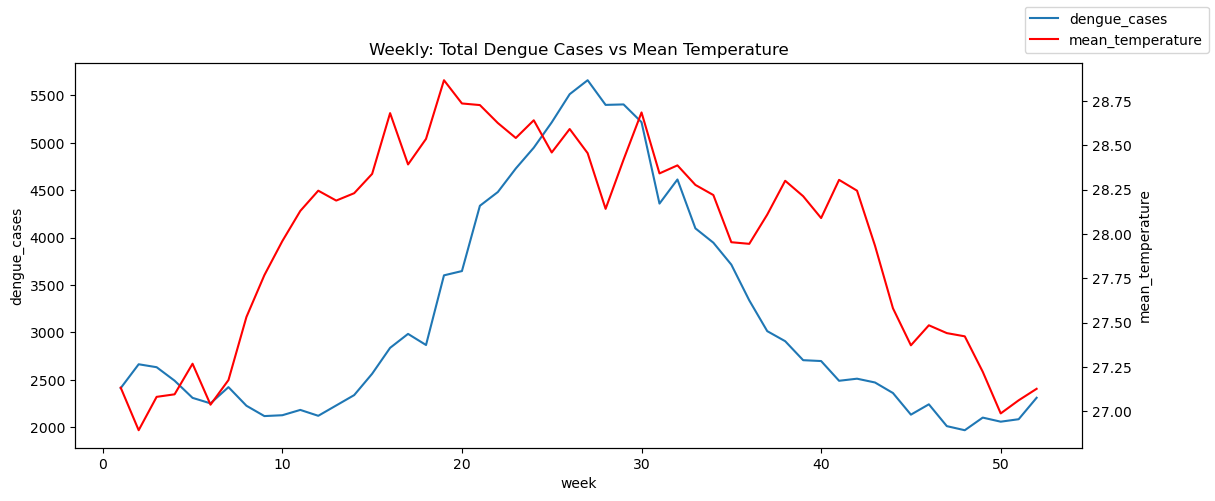

In [22]:
compare_lines(
    df=df_weekly_cumulative, 
    cols_list=['dengue_cases', 'mean_temperature'], 
    style='-',
    title='Weekly: Total Dengue Cases vs Mean Temperature'
)

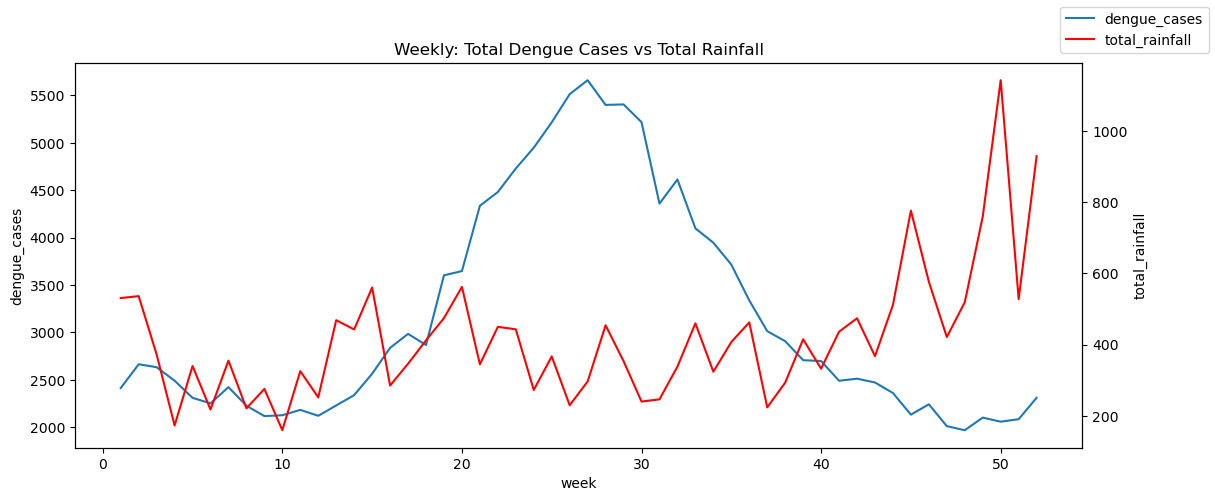

In [23]:
compare_lines(
    df=df_weekly_cumulative, 
    cols_list=['dengue_cases', 'total_rainfall'], 
    style='-',
    title='Weekly: Total Dengue Cases vs Total Rainfall'
)

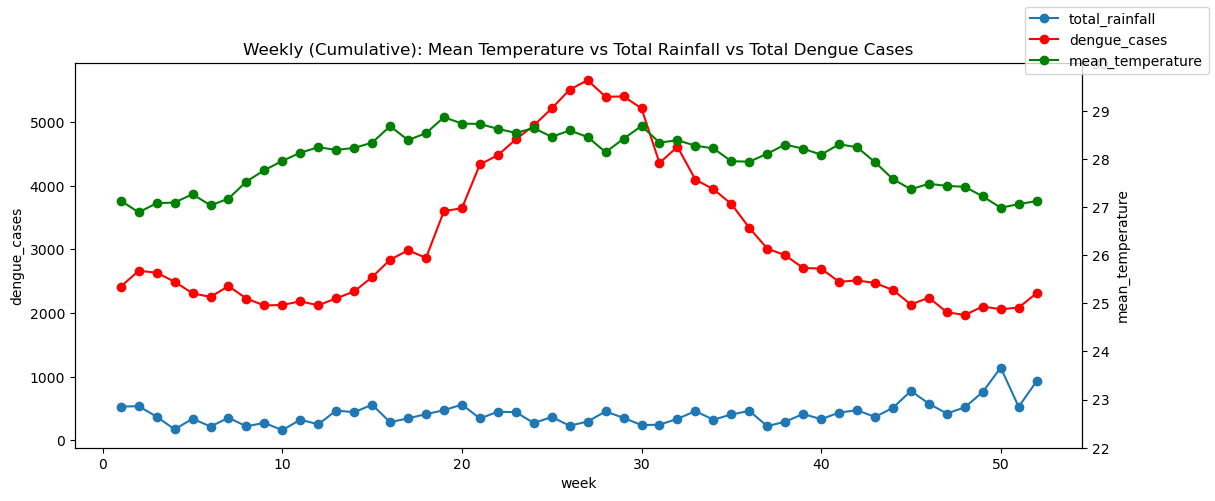

In [24]:
# Examining relationships between temperature, rainfall & dengue cases.

compare_3_lines(
    df=df_weekly_cumulative, 
    cols_list=['total_rainfall', 'dengue_cases', 'mean_temperature'],
    ylim=[22,30],
    style='o-',
    title='Weekly (Cumulative): Mean Temperature vs Total Rainfall vs Total Dengue Cases'
)

Text(0.5, 1.0, 'Weekly Dengue Cases')

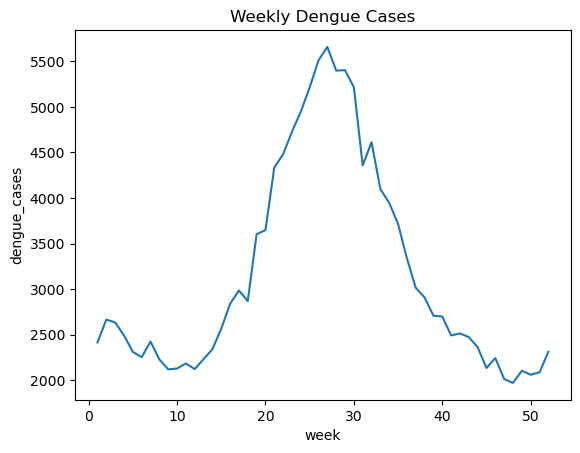

In [25]:
sns.lineplot(df_weekly_cumulative['dengue_cases'])
plt.title('Weekly Dengue Cases')


[Text(0, 0, '2985'),
 Text(0, 0, '3602'),
 Text(0, 0, '3647'),
 Text(0, 0, '4335'),
 Text(0, 0, '4480'),
 Text(0, 0, '4728'),
 Text(0, 0, '4947'),
 Text(0, 0, '5214'),
 Text(0, 0, '5511'),
 Text(0, 0, '5658'),
 Text(0, 0, '5398'),
 Text(0, 0, '5403'),
 Text(0, 0, '5216'),
 Text(0, 0, '4358'),
 Text(0, 0, '4612'),
 Text(0, 0, '4097'),
 Text(0, 0, '3946'),
 Text(0, 0, '3715'),
 Text(0, 0, '3338'),
 Text(0, 0, '3014')]

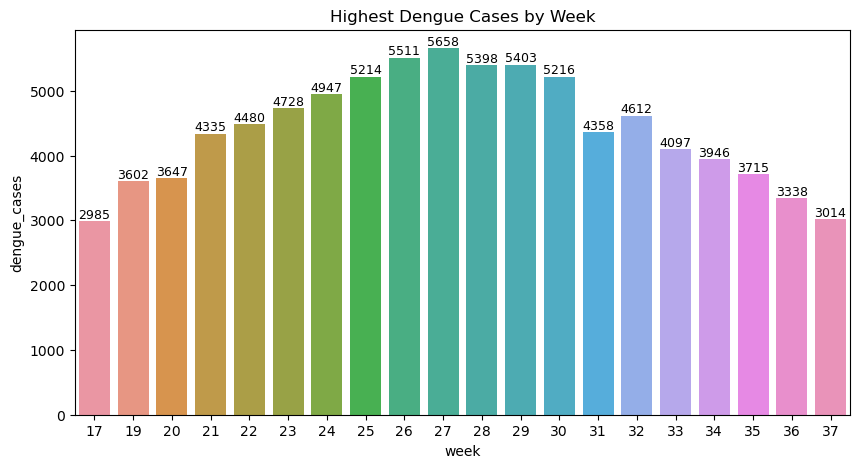

In [115]:
weekly_dengue=df_weekly_cumulative['dengue_cases'].reset_index()
weekly_dengue_sorted_high=weekly_dengue.groupby('week',as_index=False).max().sort_values('dengue_cases',ascending=False)
top20=weekly_dengue_sorted_high.head(20)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=top20,x='week',y='dengue_cases')
plt.title('Highest Dengue Cases by Week')
ax.bar_label(ax.containers[0], fontsize=9)

## Observations On Weekly Dengue Cases

- Weekly dengue data holds similar observations with monthly dengue data from on a granular weekly perspective. 

- The highest dengue cases was on week 27 which recorded a 28.5&deg;C temperature and at 296mm total rainfall.

---

## 4. GeoSpatial Location Dengue Cases (Kit Fai to input) 

## Observations

---

## 5. Google Trends Against Dengue Cases

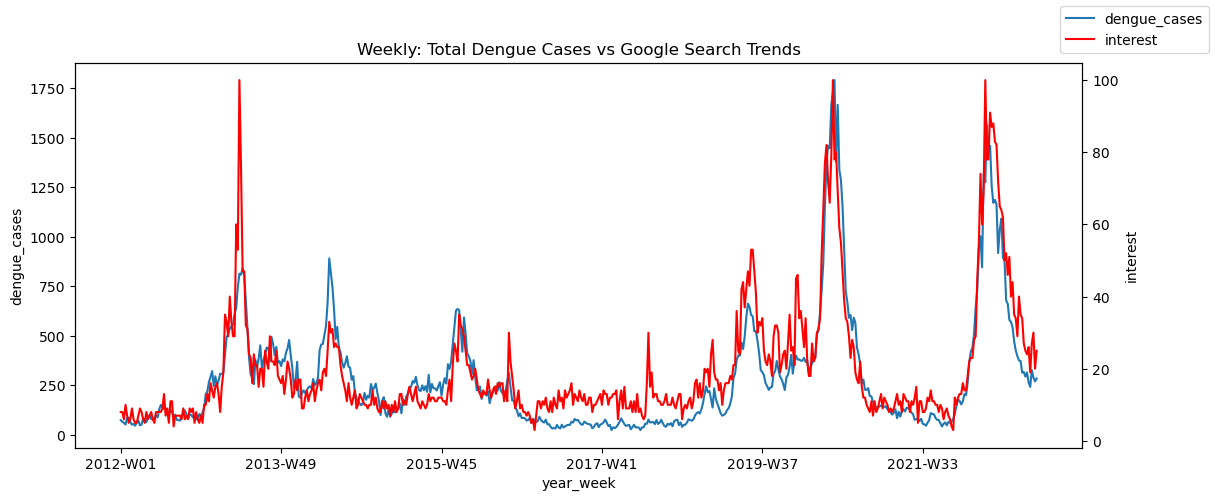

In [27]:
# Google search trends are closely related to and affected by prevailing dengue cases.

compare_lines(
    df=df_weekly, 
    cols_list=['dengue_cases', 'interest'], 
    style='-',
    title='Weekly: Total Dengue Cases vs Google Search Trends'
)

In [135]:
dengue_interest= df_weekly[['dengue_cases','interest']]

In [118]:
sorted_by_max_dengue = x.groupby('interest').max()[['year_week','dengue_cases']].sort_values(by='dengue_cases',ascending=False)

In [133]:
sorted_by_max_dengue.head(2)

year_week  dengue_cases
interest                        
78        2022-W22          1792
100       2022-W20          1729

In [120]:
sorted_by_max_interest = x.groupby('dengue_cases').max()[['year_week','interest']].sort_values(by='interest',ascending=False)

In [132]:
sorted_by_max_interest.head(2)

year_week  interest
dengue_cases                    
1729          2020-W29       100
814           2013-W23       100

Text(0.5, 1.0, 'Search Interest sorted by Increasing Trend of Dengue Cases')

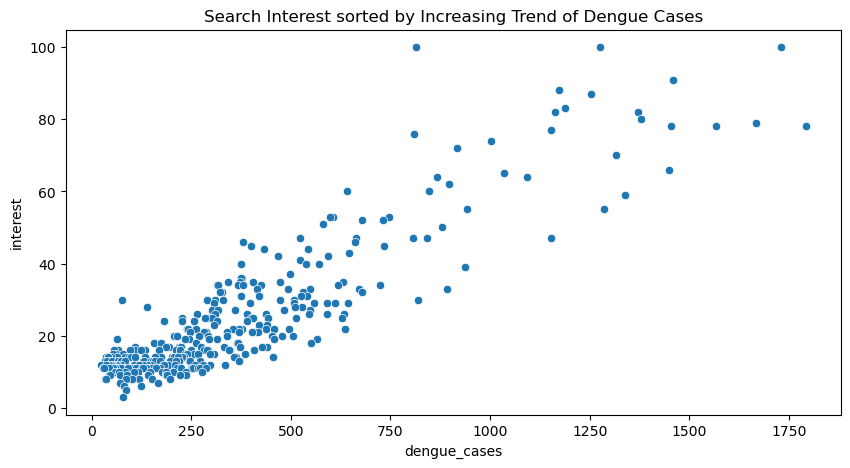

In [122]:
x=dengue_interest.reset_index()
sorted_by_max_interest = x.groupby('dengue_cases').max()[['year_week','interest']].sort_values(by='interest',ascending=False)
#top5=sorted_dengue_interest.head(5)
fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data=sorted_by_max_interest,x='dengue_cases',y='interest')
plt.title('Search Interest sorted by Increasing Trend of Dengue Cases')
#ax.bar_label(ax.containers[0], fontsize=9)

## Observations On Google Trends vs Dengue Cases

Considering Singapore has high digital penetration in society, searching on google for information is common from a behavioral perspective. As shown, there is a high correlation between dengue cases and google internet search trends. An interesting phenomena is in the years 2017 to 2018 where dengue cases were low , but the google internet search trends were higher than the dengue cases. But also in 2013, where there was a peak in google search trends similar to 2020 and 2022 but dengue cases were only below 1000 per week. We can see that in Singapore when google search trends were at its highest at 100 searches, dengue cases were in the range of 800 - 1700 cases ; more concentration of searches for dengue cases below 700 cases. 

---

## Profile Report on Weekly Data 

In [31]:
df_weekly_cumulative_profile = ProfileReport(df_weekly_cumulative,title='df_weekly_cumulative Profile Report')

In [32]:
df_weekly_cumulative_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---